In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from knn import KNN
from sklearn.neighbors import KNeighborsClassifier

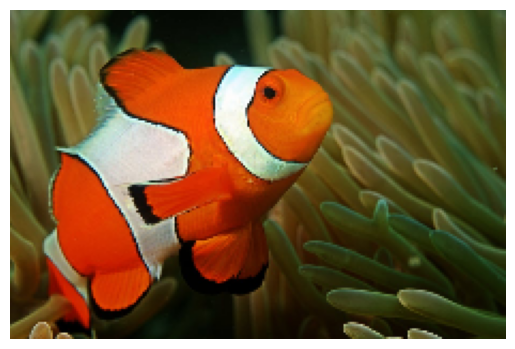

In [2]:
nemo = cv2.imread('input/nemo.jpg')
nemo = cv2.resize(nemo, (0,0), fx=.25, fy=.25)
nemo_rgb = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo_rgb)
plt.axis('off')
plt.show()

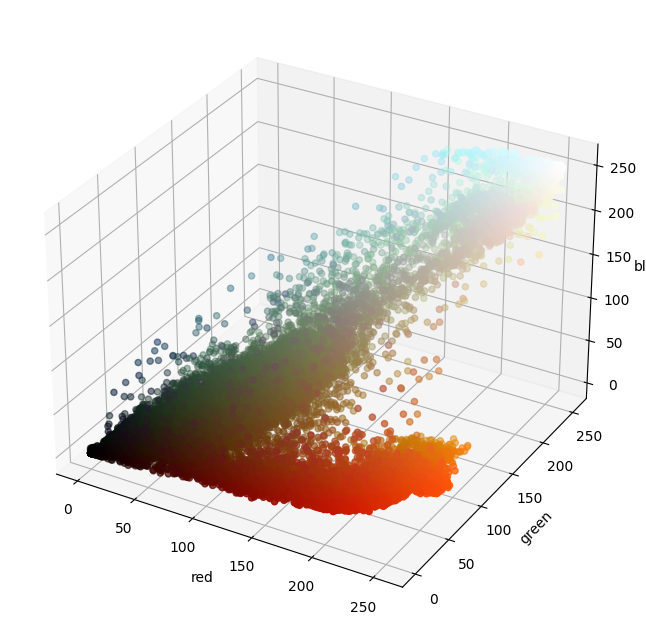

In [3]:
pixels_list_rgb = nemo_rgb.reshape(-1, 3)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_rgb[:,0], pixels_list_rgb[:,1], pixels_list_rgb[:,2], c=pixels_list_rgb/255)
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')
plt.show()

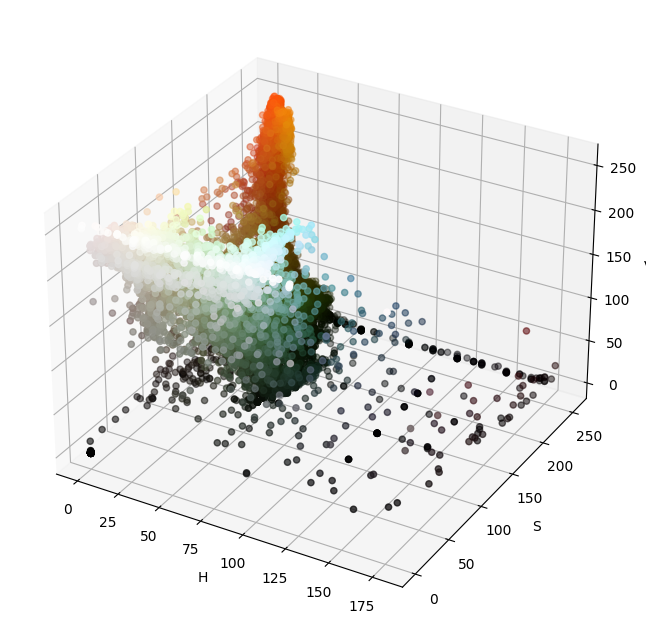

In [4]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_BGR2HSV)
pixels_list_hsv = nemo_hsv.reshape(-1, 3)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:,0], pixels_list_hsv[:,1], pixels_list_hsv[:,2], c=pixels_list_rgb/255)
ax.set_xlabel('H')
ax.set_ylabel('S')
ax.set_zlabel('V')
plt.show()

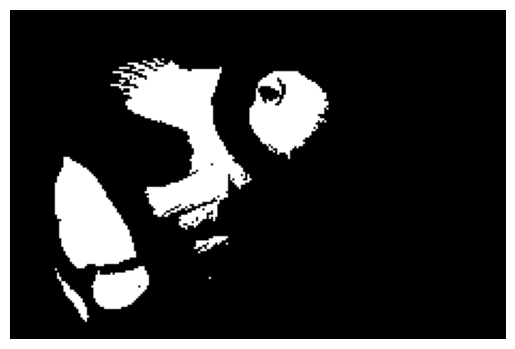

In [5]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap='gray')
plt.axis('off')
plt.show()

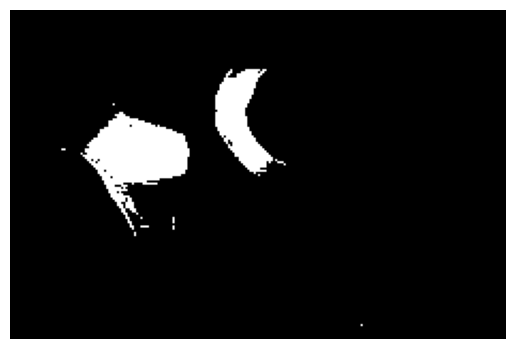

In [6]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.axis('off')
plt.show()

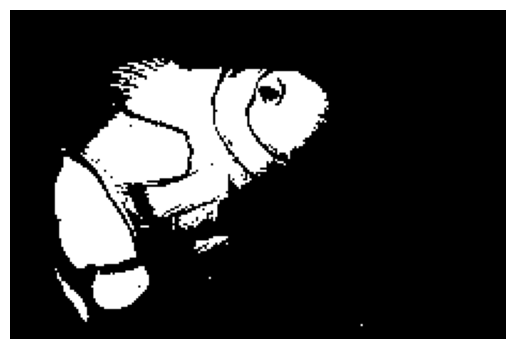

In [7]:
final_mask = mask_orange + mask_white

plt.imshow(final_mask, cmap='gray')
plt.axis('off')
plt.show()

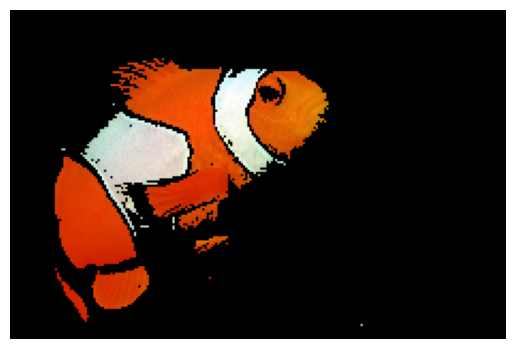

In [8]:
final_result = cv2.bitwise_and(nemo_rgb, nemo_rgb, mask=final_mask)
plt.imshow(final_result)
plt.axis('off')
plt.show()

In [9]:
X_train = pixels_list_hsv
# X_train = pixels_list_hsv[:,2]

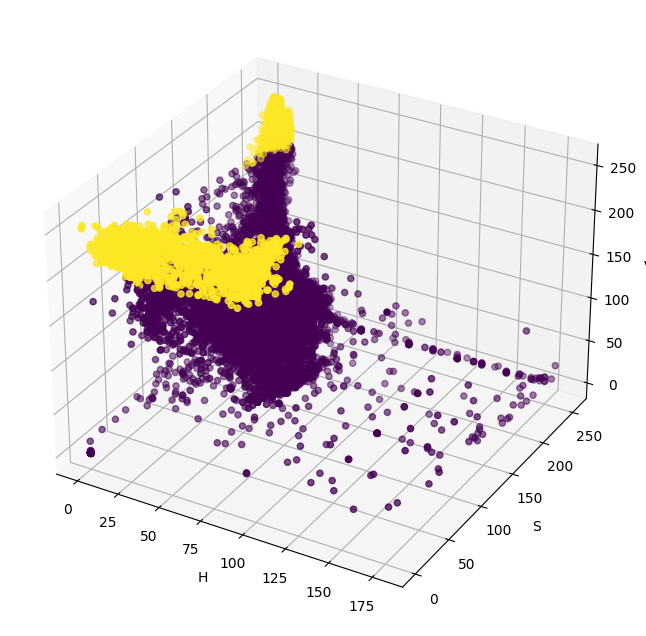

In [10]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:,0], pixels_list_hsv[:,1], pixels_list_hsv[:,2], c=final_mask.flatten()/255)
ax.set_xlabel('H')
ax.set_ylabel('S')
ax.set_zlabel('V')
plt.show()

In [11]:
Y_train = final_mask.flatten() // 255

In [12]:
Y_train[15100:15120]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [13]:
X_train[15100:15120,:]

array([[ 43,  87,  82],
       [ 60,  90, 111],
       [ 64,  63, 182],
       [ 74,  63, 209],
       [ 83,  54, 207],
       [ 76,  53, 204],
       [ 73,  55, 194],
       [ 75,  58, 197],
       [ 77,  73, 188],
       [ 76,  88, 177],
       [ 78,  85, 176],
       [ 78,  89, 187],
       [ 81,  98, 182],
       [ 79,  80, 197],
       [ 74,  60, 197],
       [ 68,  42, 200],
       [ 62,  37, 206],
       [ 67,  37, 209],
       [ 72,  35, 212],
       [ 77,  34, 210]], dtype=uint8)

## KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train.reshape(-1, 3), Y_train.reshape(-1, 1)) 

c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [15]:
abjie_nemo = cv2.imread('input/dashe-nemo.jpg')
abjie_nemo = cv2.resize(abjie_nemo, (0,0), fx=.25, fy=.25)
abjie_nemo_hsv = cv2.cvtColor(abjie_nemo, cv2.COLOR_BGR2HSV)

X_test = abjie_nemo_hsv.reshape(-1, 3)
# X_test = X_test[:,2]

new_pixel = X_test.reshape(-1, 3)[6025:6028]
# new_pixel = X_test.reshape(-1, 1)[6025:6028]

In [16]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train) 
knn.predict(new_pixel)

array([1, 1, 1], dtype=uint8)

In [21]:
my_knn = KNN(k=9)
my_knn.fit(X_train, Y_train)
res = my_knn.predict(new_pixel)

In [18]:
np.sort(res[0])[0:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1.])

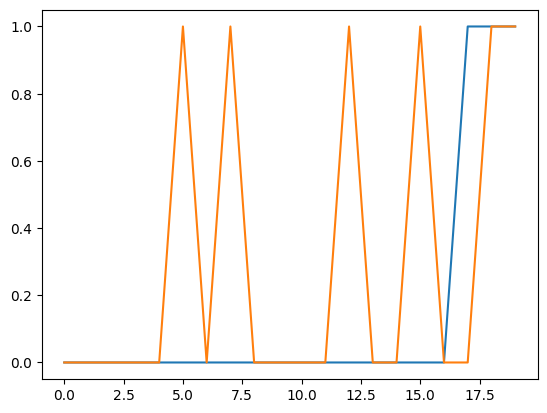

In [19]:
plt.plot(np.sort(res[0])[0:20])  
nearest_neighbors = np.argsort(res[0])[0:20]
plt.plot(Y_train[nearest_neighbors])
# result = np.bincount(Y_train[nearest_neighbors])
# results.append(np.argmax(result))

In [20]:
stop

NameError: name 'stop' is not defined

In [ ]:
abjie_nemo = cv2.imread('input/dashe-nemo.jpg')
abjie_nemo = cv2.resize(abjie_nemo, (0,0), fx=.25, fy=.25)
abjie_nemo_hsv = cv2.cvtColor(abjie_nemo, cv2.COLOR_BGR2HSV)

X_test = abjie_nemo_hsv.reshape(-1, 3)
X_test = X_test[:,2]

In [ ]:
X_train.shape

(35728,)

In [ ]:
Y_pred = knn.predict(X_test.reshape(-1, 1)) 

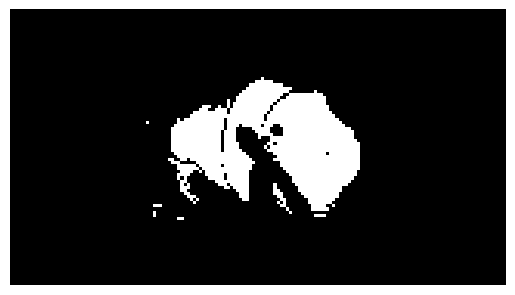

In [ ]:
image_output = np.array(Y_pred).reshape(abjie_nemo.shape[0], abjie_nemo.shape[1])
plt.imshow(image_output, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
image_output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

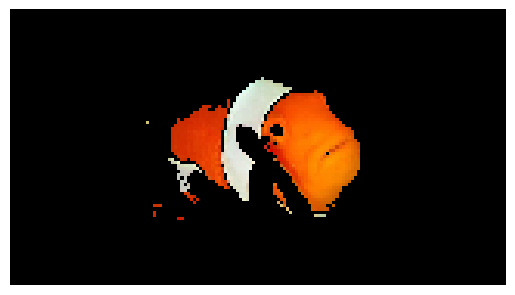

In [ ]:
final_result = cv2.bitwise_and(abjie_nemo, abjie_nemo, mask=image_output)
final_result = cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB)
plt.imshow(final_result)
plt.axis('off')
plt.show()

## my KNN

In [ ]:
my_knn = KNN(k=9)
my_knn.fit(X_train, Y_train) 

In [ ]:
abjie_nemo = cv2.imread('input/dashe-nemo.jpg')
abjie_nemo = cv2.resize(abjie_nemo, (0,0), fx=.25, fy=.25)
abjie_nemo_hsv = cv2.cvtColor(abjie_nemo, cv2.COLOR_BGR2HSV)

my_X_test = abjie_nemo_hsv.reshape(-1, 3)
my_X_test = my_X_test[:,2]

In [ ]:
abjie_nemo.shape

(89, 160, 3)

In [ ]:
my_Y_pred = my_knn.predict(my_X_test) 

In [ ]:
my_Y_pred

In [ ]:
np.array(my_Y_pred).astype(np.uint8) 

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
abjie_nemo.shape

(89, 160, 3)

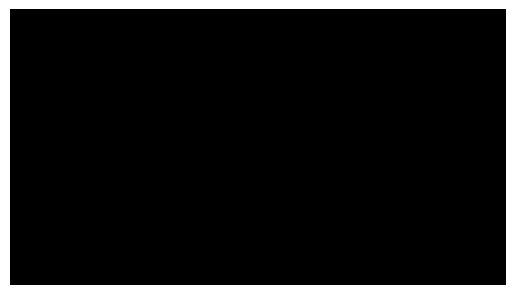

In [ ]:
my_image_output = np.array(my_Y_pred).astype(np.uint8).reshape(abjie_nemo.shape[0], abjie_nemo.shape[1])
plt.imshow(my_image_output, cmap='gray')
plt.axis('off')
plt.show()

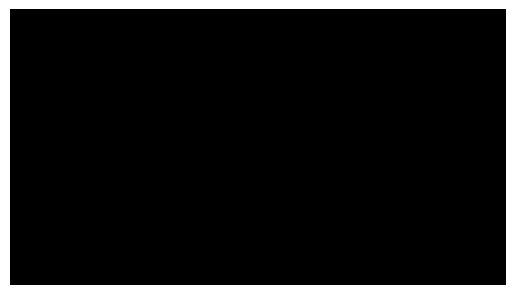

In [ ]:
my_final_result = cv2.bitwise_and(abjie_nemo, abjie_nemo, mask=my_image_output)
my_final_result = cv2.cvtColor(my_final_result, cv2.COLOR_BGR2RGB)
plt.imshow(my_final_result)
plt.axis('off')
plt.show()

In [ ]:
my_image_output

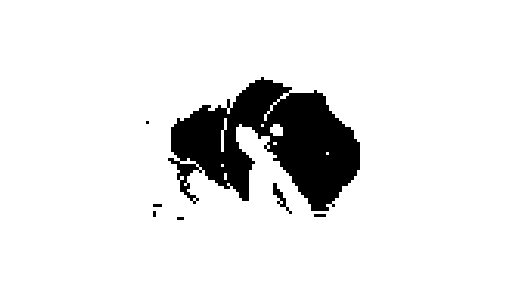

In [ ]:
def_image_output = my_image_output/2 - image_output/2 + .5
plt.imshow(def_image_output, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def_image_output[0,:]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5])